# **Noman Aziz**
# **i181561@nu.edu.pk**

# Documentation

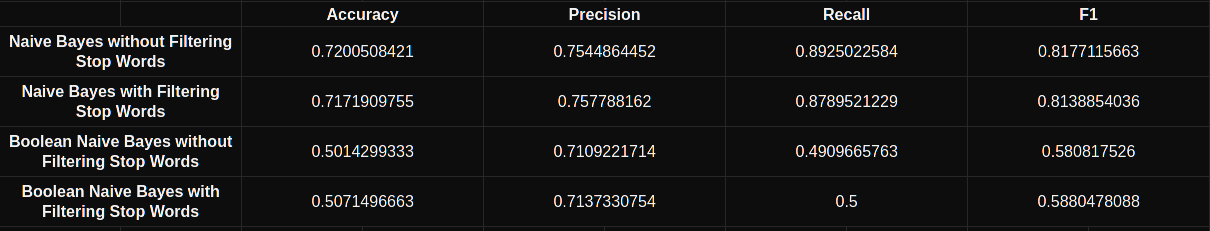




Naive Bayes theoram was written using the algorithm provided in the document. 
*   First, training data was read and stored into a dictionary which contain count of words
*   The words were cleaned to remove any numeric and english letter and also special characters.
*   Then, stop words are read and cleaned and stored in a python list
*   Then, test data is read and each file is stored in python list as a string
*   Also, different requirements of storing data were also fulfilled here, for instance boolean nb algo required to remove duplicate words, so a seperate list was created to store those non duplicate words

The Algorithm functions require some parameters which is used to tell whether this algorithm will be used to apply
*   Naive Bayes Algo with/without stop words
*   Boolean Naive Bayes Algo with/without stop words.
*   It is worth mentioning that the algorithm also 

Then for each algorith (out of four), the two algorithms were applied and their metric values were calculated.

It was seen in my calculations that the Boolean Naive Bayes algorithm decreased my overall performance as compared to the Normal Naive Bayes algorithm. In my opinion, it was due to the fact that the conditional probabilities values were effected since the count of words in the dataset was limited to 1 or 0 in case of boolean algo.

It was seen in my calculations that after filtering stop words, a slight impact on my calculations was present.

# Importing Libaries

In [ ]:
import csv
import os
import string
import math

# Reading Data and Generating Analytics

## Mounting Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Initial Variables

In [ ]:
vocabulary = dict()

N = 0
Nc = [0,0]
Nw = [0,0]

## Reading Stop Words

In [ ]:
stopWords = list()
with open('/content/drive/My Drive/NLP_ASS5/data/stopwords-ur.txt', 'rt', encoding="utf-8") as f:
  for word in f:
    cleanedWord = word.strip().strip(',').strip('/').strip('\\').strip('(').strip(')').strip('۔').strip('؟').strip('،').strip(':').strip('’')
    if cleanedWord == '' or string.ascii_letters in cleanedWord or cleanedWord.isdigit():
      continue
    stopWords.append(cleanedWord)

f.close()

stopWords = list(set(stopWords))

## Reading Training Data and Populating Variables

In [ ]:
Ni = [{},{}]
BooleanNi = [{},{}]
StopWordsNi = [{}, {}]
StopWordsBooleanNi = [{}, {}]

path = '/content/drive/My Drive/NLP_ASS5/data/Train/Fake'
for filename in os.listdir(path):

  N += 1
  Nc[0] += 1
  
  with open(path + "/" + filename, 'rt', encoding="utf-8") as f:
    for line in f:
      for word in line.split():

        cleanedWord = word.strip().strip(',').strip('/').strip('\\').strip('(').strip(')').strip('۔').strip('؟').strip('،').strip(':').strip('’')

        if cleanedWord == '' or string.ascii_letters in cleanedWord or cleanedWord.isdigit():
          continue

        Nw[0] += 1

        if cleanedWord not in vocabulary:
          vocabulary[cleanedWord] = 1
        else:
          vocabulary[cleanedWord] += 1

        if cleanedWord not in Ni[0]:
          Ni[0][cleanedWord] = 1
        else:
          Ni[0][cleanedWord] += 1

        #For Stop Words
        if cleanedWord not in stopWords:

          if cleanedWord not in StopWordsNi[0]:
            StopWordsNi[0][cleanedWord] = 1
          else:
            StopWordsNi[0][cleanedWord] += 1

          #For Stop Words Boolean Algo
          if cleanedWord not in StopWordsBooleanNi[0]:
            StopWordsBooleanNi[0][cleanedWord] = 1

        #For Boolean Algo
        if cleanedWord not in BooleanNi[0]:
          BooleanNi[0][cleanedWord] = 1

  f.close()

path = '/content/drive/My Drive/NLP_ASS5/data/Train/Real'
for filename in os.listdir(path):

  N += 1
  Nc[1] += 1
  
  with open(path + "/" + filename, 'rt', encoding="utf-8") as f:
    for line in f:
      for word in line.split():
        cleanedWord = word.strip().strip(',').strip('/').strip('\\').strip('(').strip(')').strip('۔').strip('؟').strip('،').strip(':').strip('’')

        if cleanedWord == '' or string.ascii_letters in cleanedWord or cleanedWord.isdigit():
          continue

        Nw[1] += 1

        if cleanedWord not in vocabulary:
          vocabulary[cleanedWord] = 1
        else:
          vocabulary[cleanedWord] += 1

        if cleanedWord not in Ni[1]:
          Ni[1][cleanedWord] = 1
        else:
          Ni[1][cleanedWord] += 1

        #For Stop Words
        if cleanedWord not in stopWords:

          if cleanedWord not in StopWordsNi[1]:
            StopWordsNi[1][cleanedWord] = 1
          else:
            StopWordsNi[1][cleanedWord] += 1

          #For Stop Words Boolean Algo
          if cleanedWord not in StopWordsBooleanNi[1]:
            StopWordsBooleanNi[1][cleanedWord] = 1

        #For Boolean Algo
        if cleanedWord not in BooleanNi[1]:
          BooleanNi[1][cleanedWord] = 1

  f.close()

#Unique Vocabulary
vocabulary = list(set(vocabulary))

## Reading Test Data

In [ ]:
testFakeData = []

path = '/content/drive/My Drive/NLP_ASS5/data/Test/Fake'
for filename in os.listdir(path):
  with open(path + "/" + filename, 'rt', encoding="utf-8") as f:
    for line in f:
      testFakeData.append(line)
  f.close()

testRealData = []

path = '/content/drive/My Drive/NLP_ASS5/data/Test/Real'
for filename in os.listdir(path):
  with open(path + "/" + filename, 'rt', encoding="utf-8") as f:
    for line in f:
      testRealData.append(line)
  f.close()

# Naive Bayes Theoram

## Algorithm 1 (TrainMultiNomialNb)

In [ ]:
def TrainMultiNomialNB(Ni):
  prior = [0,0]
  condprob = [{},{}]
  for c in range(2):
    prior[c] = Nc[c] / N

    for Wi in vocabulary:
      try:
        condprob[c][Wi] = (Ni[c][Wi] + 1) / (Nw[c] + len(vocabulary))
      except:
        condprob[c][Wi] = (0 + 1) / (Nw[c] + len(vocabulary))

  return prior, condprob

## Algorithm 2 (ApplyMultiNomialNb)

In [ ]:
def ApplyMultiNomialNb(text, prior, condprob, withoutStopWords):

  score = [0,0]
  words = text.split()

  for c in range(2):
    score[c] = math.log(prior[c])

    for word in words:
      Wi = word.strip().strip(',').strip('/').strip('\\').strip('(').strip(')').strip('۔').strip('؟').strip('،').strip(':').strip('’')

      if withoutStopWords == True and Wi in stopWords:
        continue 

      if Wi not in vocabulary:
        continue

      score[c] += math.log(condprob[c][Wi])

  if score[0] > score[1]:
    return "Fake"
  else:
    return "Real"

# Naive Bayer With Stop Words

## Initializing

In [ ]:
priorWithStopWords, condprobWithStopWords = TrainMultiNomialNB(Ni)

## Metrics

In [ ]:
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(len(testFakeData)):
  if ApplyMultiNomialNb(testFakeData[i], priorWithStopWords, condprobWithStopWords, False) == "Fake":
    TN += 1
  else:
    FP += 1

for i in range(len(testRealData)):
  if ApplyMultiNomialNb(testRealData[i], priorWithStopWords, condprobWithStopWords, False) == "Real":
    TP += 1
  else:
    FN += 1

## Accuracy

In [ ]:
totalData = len(testFakeData) + len(testRealData)
accuracy = (TN + TP) / totalData
print("Accuracy With Stop Words (Naive Bayes): ", accuracy)

Accuracy With Stop Words (Naive Bayes):  0.7200508420718145


## Precision

In [ ]:
precision = TP / (TP + FP)
print("Precision With Stop Words (Naive Bayes): ", precision)

Precision With Stop Words (Naive Bayes):  0.7544864452080947


## Recall

In [ ]:
recall = TP / (TP + FN)
print("Recall With Stop Words (Naive Bayes): ", recall)

Recall With Stop Words (Naive Bayes):  0.8925022583559169


## F1

In [ ]:
f1 = (2 * precision * recall) / (precision + recall)
print("F1 With Stop Words (Naive Bayes): ", f1)

F1 With Stop Words (Naive Bayes):  0.8177115663149183


# Naive Bayer Without Stop Words

## Initializing

In [ ]:
priorWithoutStopWords, condprobWithoutStopWords = TrainMultiNomialNB(StopWordsNi)

## Metrics

In [ ]:
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(len(testFakeData)):
  if ApplyMultiNomialNb(testFakeData[i], priorWithoutStopWords, condprobWithoutStopWords, True) == "Fake":
    TN += 1
  else:
    FP += 1

for i in range(len(testRealData)):
  if ApplyMultiNomialNb(testRealData[i], priorWithoutStopWords, condprobWithoutStopWords, True) == "Real":
    TP += 1
  else:
    FN += 1

## Accuracy

In [ ]:
totalData = len(testFakeData) + len(testRealData)
accuracy = (TN + TP) / totalData
print("Accuracy Without Stop Words (Naive Bayes): ", accuracy)

Accuracy Without Stop Words (Naive Bayes):  0.717190975532253


## Precision

In [ ]:
precision = TP / (TP + FP)
print("Precision Without Stop Words (Naive Bayes): ", precision)

Precision Without Stop Words (Naive Bayes):  0.7577881619937694


## Recall

In [ ]:
recall = TP / (TP + FN)
print("Recall Without Stop Words (Naive Bayes): ", recall)

Recall Without Stop Words (Naive Bayes):  0.8789521228545619


## F1

In [ ]:
f1 = (2 * precision * recall) / (precision + recall)
print("F1 Without Stop Words (Naive Bayes): ", f1)

F1 Without Stop Words (Naive Bayes):  0.8138854035968214


# Boolean Naive Bayer With Stop Words

## Initializing

In [ ]:
priorBooleanWithStopWords, condprobBooleanWithStopWords = TrainMultiNomialNB(BooleanNi)

## Metrics

In [ ]:
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(len(testFakeData)):
  if ApplyMultiNomialNb(testFakeData[i], priorBooleanWithStopWords, condprobBooleanWithStopWords, False) == "Fake":
    TN += 1
  else:
    FP += 1

for i in range(len(testRealData)):
  if ApplyMultiNomialNb(testRealData[i], priorBooleanWithStopWords, condprobBooleanWithStopWords, False) == "Real":
    TP += 1
  else:
    FN += 1

## Accuracy

In [ ]:
totalData = len(testFakeData) + len(testRealData)
accuracy = (TN + TP) / totalData
print("Accuracy With Stop Words (Boolean Naive Bayes): ", accuracy)

Accuracy With Stop Words (Boolean Naive Bayes):  0.5014299332697807


## Precision

In [ ]:
precision = TP / (TP + FP)
print("Precision With Stop Words (Boolean Naive Bayes): ", precision)

Precision With Stop Words (Boolean Naive Bayes):  0.7109221713538261


## Recall

In [ ]:
recall = TP / (TP + FN)
print("Recall With Stop Words (Boolean Naive Bayes): ", recall)

Recall With Stop Words (Boolean Naive Bayes):  0.49096657633243


## F1

In [ ]:
f1 = (2 * precision * recall) / (precision + recall)
print("F1 With Stop Words (Boolean Naive Bayes): ", f1)

F1 With Stop Words (Boolean Naive Bayes):  0.5808175260486241


# Boolean Naive Bayer Without Stop Words

## Initializing

In [ ]:
priorBooleanWithoutStopWords, condprobBooleanWithoutStopWords = TrainMultiNomialNB(StopWordsBooleanNi)

## Metrics

In [ ]:
TP = 0
TN = 0
FP = 0
FN = 0

for i in range(len(testFakeData)):
  if ApplyMultiNomialNb(testFakeData[i], priorBooleanWithoutStopWords, condprobBooleanWithoutStopWords, True) == "Fake":
    TN += 1
  else:
    FP += 1

for i in range(len(testRealData)):
  if ApplyMultiNomialNb(testRealData[i], priorBooleanWithoutStopWords, condprobBooleanWithoutStopWords, True) == "Real":
    TP += 1
  else:
    FN += 1

## Accuracy

In [ ]:
totalData = len(testFakeData) + len(testRealData)
accuracy = (TN + TP) / totalData
print("Accuracy Without Stop Words (Boolean Naive Bayes): ", accuracy)

Accuracy Without Stop Words (Boolean Naive Bayes):  0.5071496663489037


## Precision

In [ ]:
precision = TP / (TP + FP)
print("Precision Without Stop Words (Boolean Naive Bayes): ", precision)

Precision Without Stop Words (Boolean Naive Bayes):  0.7137330754352031


## Recall

In [ ]:
recall = TP / (TP + FN)
print("Recall Without Stop Words (Boolean Naive Bayes): ", recall)

Recall Without Stop Words (Boolean Naive Bayes):  0.5


## Recall

In [ ]:
f1 = (2 * precision * recall) / (precision + recall)
print("F1 Without Stop Words (Boolean Naive Bayes): ", f1)

F1 Without Stop Words (Boolean Naive Bayes):  0.5880478087649402
